In [2]:
%matplotlib inline
import nba_py as nba
from nba_py import player
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import math
import tqdm

In [2]:
plist = player.PlayerList(league_id='00', season='2016-17', only_current=1)
df = plist.info()
main_df = df[['PERSON_ID', 'DISPLAY_FIRST_LAST']]

In [3]:
CD_2ft_FGA = []
CD_4ft_FGA = []
CD_6ft_FGA = []
CD_open_FGA = []
CD_2ft_FG_PCT = []
CD_4ft_FG_PCT = []
CD_6ft_FG_PCT = []
CD_open_FG_PCT = []

CD_long_2ft_FGA = []
CD_long_4ft_FGA = []
CD_long_6ft_FGA = []
CD_long_open_FGA = []
CD_long_2ft_FG_PCT = []
CD_long_4ft_FG_PCT = []
CD_long_6ft_FG_PCT = []
CD_long_open_FG_PCT = []

Drib_0_FGA = []
Drib_1_FGA = []
Drib_2_FGA = []
Drib_3_FGA = []
Drib_7_FGA = []
Drib_0_FG_PCT = []
Drib_1_FG_PCT = []
Drib_2_FG_PCT = []
Drib_3_FG_PCT = []
Drib_7_FG_PCT = []

SC_24_FGA = []
SC_22_FGA = []
SC_18_FGA = []
SC_15_FGA = []
SC_7_FGA = []
SC_4_FGA = []
SC_0_FGA = []
SC_24_FG_PCT = []
SC_22_FG_PCT = []
SC_18_FG_PCT = []
SC_15_FG_PCT = []
SC_7_FG_PCT = []
SC_4_FG_PCT = []
SC_0_FG_PCT = []

TT_2_FGA = []
TT_6_FGA = []
TT_long_FGA = []
TT_2_FG_PCT = []
TT_6_FG_PCT = []
TT_long_FG_PCT = []

ST_CS_FGA = []
ST_PU_FGA = []
ST_LT10_FGA = []
ST_Other_FGA = []
ST_CS_FG_PCT = []
ST_PU_FG_PCT = []
ST_LT10_FG_PCT = []
ST_Other_FG_PCT = []

In [ ]:
for p_id in tqdm.tqdm(main_df['PERSON_ID']):
    cur_player = player.PlayerShotTracking(p_id)
    if len(cur_player.dribble_shooting()) >= 5:
        Drib_0_FGA.append(cur_player.dribble_shooting().ix[0]['FGA'])
        Drib_1_FGA.append(cur_player.dribble_shooting().ix[1]['FGA'])
        Drib_2_FGA.append(cur_player.dribble_shooting().ix[2]['FGA'])
        Drib_3_FGA.append(cur_player.dribble_shooting().ix[3]['FGA'])
        Drib_7_FGA.append(cur_player.dribble_shooting().ix[4]['FGA'])
        Drib_0_FG_PCT.append(cur_player.dribble_shooting().ix[0]['FG_PCT'])
        Drib_1_FG_PCT.append(cur_player.dribble_shooting().ix[1]['FG_PCT'])
        Drib_2_FG_PCT.append(cur_player.dribble_shooting().ix[2]['FG_PCT'])
        Drib_3_FG_PCT.append(cur_player.dribble_shooting().ix[3]['FG_PCT'])
        Drib_7_FG_PCT.append(cur_player.dribble_shooting().ix[4]['FG_PCT'])
    else:
        Drib_0_FGA.append(None)
        Drib_1_FGA.append(None)
        Drib_2_FGA.append(None)
        Drib_3_FGA.append(None)
        Drib_7_FGA.append(None)
        Drib_0_FG_PCT.append(None)
        Drib_1_FG_PCT.append(None)
        Drib_2_FG_PCT.append(None)
        Drib_3_FG_PCT.append(None)
        Drib_7_FG_PCT.append(None)

main_df['Drib_0_FGA'] = Drib_0_FGA
main_df['Drib_1_FGA'] = Drib_1_FGA
main_df['Drib_2_FGA'] = Drib_2_FGA
main_df['Drib_3_FGA'] = Drib_3_FGA
main_df['Drib_7_FGA'] = Drib_7_FGA
main_df['Drib_0_FG_PCT'] = Drib_0_FG_PCT
main_df['Drib_1_FG_PCT'] = Drib_1_FG_PCT
main_df['Drib_2_FG_PCT'] = Drib_2_FG_PCT
main_df['Drib_3_FG_PCT'] = Drib_3_FG_PCT
main_df['Drib_7_FG_PCT'] = Drib_7_FG_PCT

# Let's look at Closest Defender analysis

In [3]:
#SAVED OFF ALREADY
main_df = pd.read_csv('/Users/andrewzhuang/Desktop/TDI files/main_df.csv')
del main_df['Unnamed: 0']

FileNotFoundError: File b'/Users/andrewzhuang/Desktop/TDI files/main_df.csv' does not exist

In [32]:
main_df.head()

,PERSON_ID,DISPLAY_FIRST_LAST,CD_2ft_FGA,CD_4ft_FGA,CD_6ft_FGA,CD_open_FGA,CD_2ft_FG_PCT,CD_4ft_FG_PCT,CD_6ft_FG_PCT,CD_open_FG_PCT
0,203518,Alex Abrines,0.40,1.16,2.15,1.31,0.444,0.380,0.397,0.382
1,203112,Quincy Acy,0.05,0.13,0.16,0.21,0.500,0.600,0.500,0.125
2,203500,Steven Adams,2.63,4.10,1.10,0.34,0.495,0.591,0.636,0.741
3,201167,Arron Afflalo,0.77,2.79,2.43,0.85,0.447,0.435,0.419,0.519
4,201582,Alexis Ajinca,0.77,1.74,1.03,1.00,0.400,0.574,0.550,0.410


In [23]:
main_df.mean()

PERSON_ID         550907.790224
CD_2ft_FGA             1.293443
CD_4ft_FGA             2.548004
CD_6ft_FGA             2.009737
CD_open_FGA            1.369254
CD_2ft_FG_PCT          0.441314
CD_4ft_FG_PCT          0.470000
CD_6ft_FG_PCT          0.447691
CD_open_FG_PCT         0.433309
dtype: float64

In [20]:
del main_df['Q4_FG_PCT']

In [24]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)

In [34]:
pca_df = main_df.copy(deep = True)
pca_df = pca_df.dropna()
X = pca_df.ix[:,2:9]
Y = pca_df.ix[:,0]

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [43]:
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [58]:
Y_sklearn_df = pd.DataFrame(Y_sklearn)
Y_sklearn_df.columns = ['x','y']

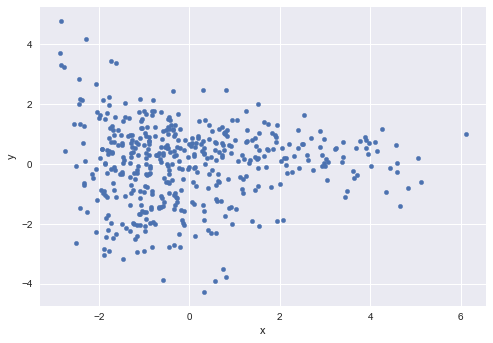

In [59]:
Y_sklearn_df.plot(x = 'x', y = 'y', kind = 'scatter')

### Let's look for nearest neighbours for Kyle Lowry

In [65]:
selected_player = main_df[main_df['DISPLAY_FIRST_LAST'] == 'Kyle Lowry'].iloc[0]
selected_player

PERSON_ID                 200768
DISPLAY_FIRST_LAST    Kyle Lowry
CD_2ft_FGA                  2.49
CD_4ft_FGA                  5.83
CD_6ft_FGA                  5.05
CD_open_FGA                  1.9
CD_2ft_FG_PCT              0.463
CD_4ft_FG_PCT              0.442
CD_6ft_FG_PCT              0.477
CD_open_FG_PCT             0.482
Name: 275, dtype: object

In [71]:
# Choose only the numeric columns (we'll use these to compute euclidean distance)
distance_columns = ['CD_2ft_FGA','CD_4ft_FGA','CD_6ft_FGA','CD_open_FGA',
                    'CD_2ft_FG_PCT','CD_4ft_FG_PCT','CD_6ft_FG_PCT','CD_open_FG_PCT']

def euclidean_distance(row):
    """
    A simple euclidean distance function
    """
    inner_value = 0
    for k in distance_columns:
        inner_value += (row[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)

# Distance from Kyle
main_df['Lowry_distance'] = main_df.apply(euclidean_distance, axis=1)

In [72]:
main_df

,PERSON_ID,DISPLAY_FIRST_LAST,CD_2ft_FGA,CD_4ft_FGA,CD_6ft_FGA,CD_open_FGA,CD_2ft_FG_PCT,CD_4ft_FG_PCT,CD_6ft_FG_PCT,CD_open_FG_PCT,Lowry_distance
0,203518,Alex Abrines,0.40,1.16,2.15,1.31,0.444,0.380,0.397,0.382,5.912335
1,203112,Quincy Acy,0.05,0.13,0.16,0.21,0.500,0.600,0.500,0.125,8.084931
2,203500,Steven Adams,2.63,4.10,1.10,0.34,0.495,0.591,0.636,0.741,4.600455
3,201167,Arron Afflalo,0.77,2.79,2.43,0.85,0.447,0.435,0.419,0.519,4.491318
4,201582,Alexis Ajinca,0.77,1.74,1.03,1.00,0.400,0.574,0.550,0.410,6.057129
5,202332,Cole Aldrich,0.37,0.81,0.18,0.03,0.391,0.520,0.727,1.000,7.566419
6,200746,LaMarcus Aldridge,2.39,4.76,3.82,3.59,0.518,0.512,0.446,0.439,2.352580
7,202730,Lavoy Allen,0.58,0.90,0.60,0.72,0.371,0.574,0.472,0.372,7.013267
8,2754,Tony Allen,3.00,3.34,1.08,0.96,0.423,0.523,0.416,0.412,4.808480
9,202329,Al-Farouq Aminu,1.67,1.90,1.33,2.72,0.353,0.509,0.395,0.337,5.538270


In [75]:
main_df[main_df['Lowry_distance'] < 1]

,PERSON_ID,DISPLAY_FIRST_LAST,CD_2ft_FGA,CD_4ft_FGA,CD_6ft_FGA,CD_open_FGA,CD_2ft_FG_PCT,CD_4ft_FG_PCT,CD_6ft_FG_PCT,CD_open_FG_PCT,Lowry_distance
48,202339,Eric Bledsoe,2.30,5.67,5.17,2.64,0.524,0.446,0.423,0.373,0.801395
114,201609,Goran Dragic,2.89,5.89,5.04,1.52,0.488,0.449,0.492,0.523,0.557387
186,202330,Gordon Hayward,2.41,5.32,5.62,2.48,0.438,0.454,0.510,0.459,0.964462
275,200768,Kyle Lowry,2.49,5.83,5.05,1.90,0.463,0.442,0.477,0.482,0.000000
455,203079,Dion Waiters,2.24,5.87,4.63,1.65,0.427,0.404,0.446,0.434,0.555882


### Make visualizations for closest matches for 'Closest Defender' matches of Kyle Lowry

In [77]:
#Get clutchtime data for Kyle Lowry

In [78]:
Kyle_Lowry_clutch.last10sec_deficit_3point()

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,Last 10 SEC <= 3 PTS,2016-17,13,2,11,0.154,0.2,0.1,0.4,0.2,...,1,1,1,1,1,1,1,1,13,2016-17


In [79]:
Kyle_Lowry_clutch = player.PlayerClutchSplits('200768')

In [80]:
df = pd.read_csv('/Users/andrewzhuang/Desktop/TDI files/main_df.csv')

In [127]:
df[df['DISPLAY_FIRST_LAST'] == 'DeMar DeRozan']

,PERSON_ID,DISPLAY_FIRST_LAST,Q1_FGA,Q4_FGA,Q1_FG_PCT,Q4_FG_PCT
103,201942,DeMar DeRozan,6.4,4.4,0.468,0.49


In [98]:
df.mean()

PERSON_ID    550907.790224
Q1_FGA            2.089301
Q4_FGA            2.115066
Q1_FG_PCT         0.434605
Q4_FG_PCT         0.447511
dtype: float64

## Add shot clock percentages

In [ ]:
fourth_quarter_FGA = []
fourth_quarter_FGP = []
first_quarter_FGA = []
first_quarter_FGP = []
for p_id in tqdm.tqdm(df['PERSON_ID']):
    cur_df = player.PlayerShootingSplits((p_id).by_period()
    if len(cur_df) >= 4:
        first_quarter_FGA.append(cur_df.ix[0]['FGA'])
        first_quarter_FGP.append(cur_df.ix[0]['FG_PCT'])
        fourth_quarter_FGA.append(cur_df.ix[3]['FGA'])
        fourth_quarter_FGP.append(cur_df.ix[3]['FG_PCT'])
    else:
        first_quarter_FGA.append(None)
        first_quarter_FGP.append(None)
        fourth_quarter_FGA.append(None)
        fourth_quarter_FGP.append(None)

In [99]:
KL_shootsplit = player.PlayerShootingSplits('200768')

In [106]:
KL_shootsplit_late = player.PlayerShootingSplits('200768', shot_clock_range = 'ShotClock Off')

In [115]:
KL_shootsplit.shot_5ft()

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Distance (5ft),Less Than 5 ft.,151,256,0.590,0,0,0.000,0.590,39,...,4,9,1,5,3,4,3,5,47,Less Than 5 ft.
1,Shot Distance (5ft),5-9 ft.,31,75,0.413,0,0,0.000,0.413,9,...,6,8,4,2,3,4,6,2,47,5-9 ft.
2,Shot Distance (5ft),10-14 ft.,22,50,0.440,0,0,0.000,0.440,4,...,5,6,3,3,3,4,5,3,47,10-14 ft.
3,Shot Distance (5ft),15-19 ft.,19,49,0.388,0,0,0.000,0.388,0,...,7,1,2,4,3,4,4,4,47,15-19 ft.
4,Shot Distance (5ft),20-24 ft.,74,172,0.430,64,152,0.421,0.616,0,...,2,1,5,1,1,3,2,6,47,20-24 ft.
5,Shot Distance (5ft),25-29 ft.,127,309,0.411,127,309,0.411,0.617,5,...,1,7,5,6,2,2,1,7,47,25-29 ft.
6,Shot Distance (5ft),30-34 ft.,2,5,0.400,2,5,0.400,0.600,0,...,3,1,5,6,3,1,7,1,47,30-34 ft.
7,Shot Distance (5ft),35-39 ft.,0,1,0.000,0,1,0.000,0.000,0,...,8,1,5,6,3,4,7,8,47,35-39 ft.
8,Shot Distance (5ft),40+ ft.,0,1,0.000,0,1,0.000,0.000,0,...,8,1,5,6,3,4,7,8,47,40+ ft.


In [114]:
KL_shootsplit_late.shot_5ft()

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Distance (5ft),Less Than 5 ft.,0,2,0.00,0,0,0.00,0.000,1,...,2,8,1,1,2,1,2,1,47,Less Than 5 ft.
1,Shot Distance (5ft),5-9 ft.,0,2,0.00,0,0,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,5-9 ft.
2,Shot Distance (5ft),10-14 ft.,0,0,0.00,0,0,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,10-14 ft.
3,Shot Distance (5ft),15-19 ft.,0,1,0.00,0,0,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,15-19 ft.
4,Shot Distance (5ft),20-24 ft.,3,4,0.75,3,4,0.75,1.125,0,...,1,1,1,1,1,1,1,1,47,20-24 ft.
5,Shot Distance (5ft),25-29 ft.,0,7,0.00,0,7,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,25-29 ft.
6,Shot Distance (5ft),30-34 ft.,0,1,0.00,0,1,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,30-34 ft.
7,Shot Distance (5ft),40+ ft.,0,0,0.00,0,0,0.00,0.000,0,...,2,1,1,1,2,1,2,1,47,40+ ft.


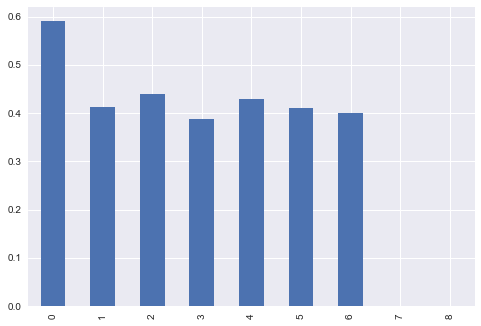

In [117]:
KL_shootsplit.shot_5ft()['FG_PCT'].plot(kind = 'bar')

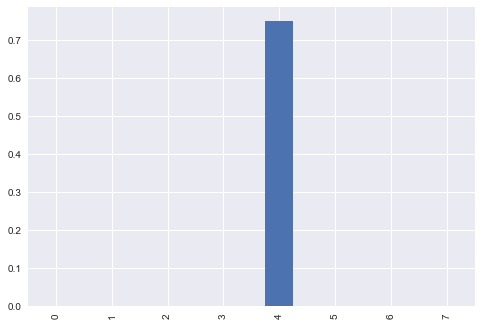

In [118]:
KL_shootsplit_late.shot_5ft()['FG_PCT'].plot(kind = 'bar')

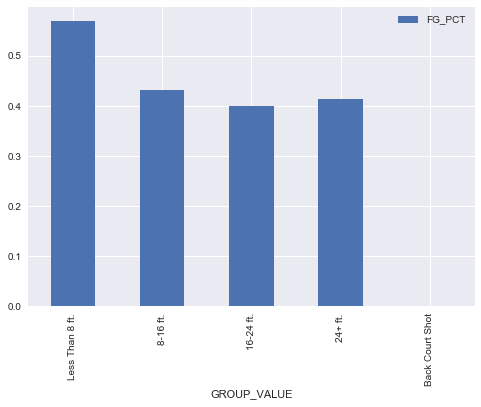

In [125]:
KL_shootsplit.shot_8ft().ix[:,['FG_PCT','GROUP_VALUE']].plot(kind = 'bar', x = 'GROUP_VALUE')

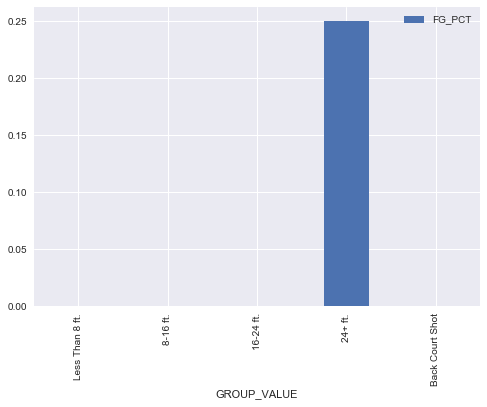

In [126]:
KL_shootsplit_late.shot_8ft().ix[:,['FG_PCT','GROUP_VALUE']].plot(kind = 'bar', x = 'GROUP_VALUE')

In [128]:
201942

201942

In [129]:
DD_shootsplit = player.PlayerShootingSplits('201942')
DD_shootsplit_late = player.PlayerShootingSplits('201942', shot_clock_range = 'ShotClock Off')

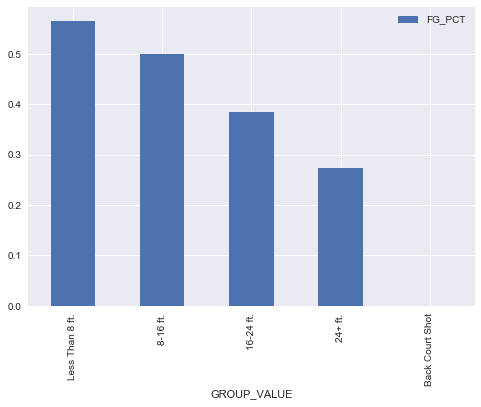

In [130]:
DD_shootsplit.shot_8ft().ix[:,['FG_PCT','GROUP_VALUE']].plot(kind = 'bar', x = 'GROUP_VALUE')

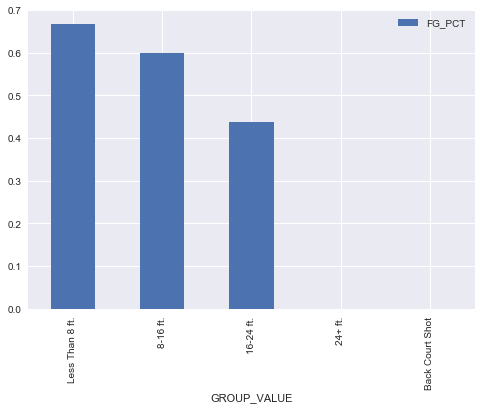

In [131]:
DD_shootsplit_late.shot_8ft().ix[:,['FG_PCT','GROUP_VALUE']].plot(kind = 'bar', x = 'GROUP_VALUE')

In [133]:
DD_shootsplit.shot_8ft()

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Distance (8ft),Less Than 8 ft.,286,506,0.565,0,0,0.000,0.565,54,...,1,5,2,2,2,2,3,2,48,Less Than 8 ft.
1,Shot Distance (8ft),8-16 ft.,218,437,0.499,0,0,0.000,0.499,22,...,2,4,3,1,2,2,4,1,48,8-16 ft.
2,Shot Distance (8ft),16-24 ft.,184,478,0.385,0,0,0.000,0.385,15,...,4,3,1,3,2,2,2,3,48,16-24 ft.
3,Shot Distance (8ft),24+ ft.,33,121,0.273,33,121,0.273,0.409,0,...,3,1,4,4,1,1,1,4,48,24+ ft.
4,Shot Distance (8ft),Back Court Shot,0,3,0.000,0,3,0.000,0.000,0,...,5,1,4,4,2,2,5,5,48,Back Court Shot


In [4]:
PST = player.PlayerShotTracking(203500)

In [5]:
PST

In [6]:
PST.general_shooting()

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,SHOT_TYPE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,203500,"Adams, Steven",1,80,36,Catch and Shoot,0.072,0.25,0.59,0.426,0.426,0.070,0.25,0.58,0.435,0.002,0.0,0.01,0.0
1,203500,"Adams, Steven",2,80,13,Pull Ups,0.020,0.01,0.16,0.077,0.077,0.020,0.01,0.16,0.077,0.000,0.0,0.00,NaN
2,203500,"Adams, Steven",3,80,80,Less than 10 ft,0.908,4.41,7.41,0.595,0.595,0.908,4.41,7.41,0.595,0.000,0.0,0.00,NaN


In [27]:
PST.dir(PST)[len(dir(PST)) - 2]()

AttributeError: 'PlayerShotTracking' object has no attribute 'dir'

In [30]:
methods = [a for a in dir(PST) if not a.startswith('_')]

In [31]:
methods

['closest_defender_shooting',
 'closest_defender_shooting_long',
 'dribble_shooting',
 'general_shooting',
 'json',
 'overall',
 'shot_clock_shooting',
 'touch_time_shooting']

In [32]:
PST.overall()

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,SHOT_TYPE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,203500,"Adams, Steven",1,80,80,Overall,1.0,4.68,8.16,0.573,0.573,0.998,4.68,8.15,0.574,0.002,0.0,0.01,0.0


In [57]:
PST.json

{'parameters': {'DateFrom': None,
  'DateTo': None,
  'GameSegment': None,
  'LastNGames': 0,
  'LeagueID': '00',
  'Location': None,
  'Month': 0,
  'OpponentTeamID': 0,
  'Outcome': None,
  'PerMode': 'PerGame',
  'Period': 0,
  'PlayerID': 203500,
  'Season': '2016-17',
  'SeasonSegment': None,
  'SeasonType': 'Regular Season',
  'TeamID': 0,
  'VsConference': None,
  'VsDivision': None},
 'resource': 'playerdashptshots',
 'resultSets': [{'headers': ['PLAYER_ID',
    'PLAYER_NAME_LAST_FIRST',
    'SORT_ORDER',
    'GP',
    'G',
    'SHOT_TYPE',
    'FGA_FREQUENCY',
    'FGM',
    'FGA',
    'FG_PCT',
    'EFG_PCT',
    'FG2A_FREQUENCY',
    'FG2M',
    'FG2A',
    'FG2_PCT',
    'FG3A_FREQUENCY',
    'FG3M',
    'FG3A',
    'FG3_PCT'],
   'name': 'Overall',
   'rowSet': [[203500,
     'Adams, Steven',
     1,
     80,
     80,
     'Overall',
     1.0,
     4.68,
     8.16,
     0.573,
     0.573,
     0.998,
     4.68,
     8.15,
     0.574,
     0.002,
     0.0,
     0.01,
     0

In [46]:
df2 = pd.DataFrame.from_dict(PST.json, orient='index')
df2

,0
resource,playerdashptshots
parameters,"{'PerMode': 'PerGame', 'LeagueID': '00', 'Seas..."
resultSets,"[{'name': 'Overall', 'headers': ['PLAYER_ID', ..."


In [62]:
df2.ix[2][0]

7

In [70]:
df3 = pd.DataFrame.from_dict(df2.ix[2][0][2], orient='index')

In [71]:
df3

,0
name,ShotClockShooting
headers,"[PLAYER_ID, PLAYER_NAME_LAST_FIRST, SORT_ORDER..."
rowSet,"[[203500, Adams, Steven, 1, 80, 46, 24-22, 0.1..."


In [72]:
df3.ix[2][0]

[[203500,
  'Adams, Steven',
  1,
  80,
  46,
  '24-22',
  0.126,
  0.58,
  1.03,
  0.561,
  0.561,
  0.126,
  0.58,
  1.03,
  0.561,
  0.0,
  0.0,
  0.0,
  None],
 [203500,
  'Adams, Steven',
  2,
  80,
  45,
  '22-18 Very Early',
  0.112,
  0.58,
  0.91,
  0.63,
  0.63,
  0.112,
  0.58,
  0.91,
  0.63,
  0.0,
  0.0,
  0.0,
  None],
 [203500,
  'Adams, Steven',
  3,
  80,
  57,
  '18-15 Early',
  0.158,
  0.8,
  1.29,
  0.621,
  0.621,
  0.158,
  0.8,
  1.29,
  0.621,
  0.0,
  0.0,
  0.0,
  None],
 [203500,
  'Adams, Steven',
  4,
  80,
  76,
  '15-7 Average',
  0.456,
  2.2,
  3.73,
  0.591,
  0.591,
  0.456,
  2.2,
  3.73,
  0.591,
  0.0,
  0.0,
  0.0,
  None],
 [203500,
  'Adams, Steven',
  5,
  80,
  41,
  '7-4 Late',
  0.078,
  0.33,
  0.64,
  0.51,
  0.51,
  0.078,
  0.33,
  0.64,
  0.51,
  0.0,
  0.0,
  0.0,
  None],
 [203500,
  'Adams, Steven',
  6,
  80,
  21,
  '4-0 Very Late',
  0.041,
  0.11,
  0.34,
  0.333,
  0.333,
  0.041,
  0.11,
  0.34,
  0.333,
  0.0,
  0.0,
  0.0,
